In [21]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analysis_support import *
from plots import *

# IMPORTANT: need to install package `cm-super-minimal` and `dvipng` for matplotlib Latex Output to work

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [22]:
instance_set = 'all'
instances = None
#instance_set = 'handcrafted'
#instances = [119, 160, 188, 192, 196, 250, 261, 263, 278, 287]

In [23]:
no_goods_type = 'single_edge'
#no_goods_type = 'multi_edge'

In [24]:
solver = 'a_star'

In [25]:
seeds = [1, 41, 83, 139, 181, 257, 307, 353, 401, 449]

In [26]:
file_pattern = f'classic.BARN-{instance_set}/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
table = tabulate_deterministic_results(results)

classic.BARN-all/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json
Found 96000 result files
Missing results: 0


In [27]:
table.head()

,domain,instance,seed,sequence,max_speed,no_good_type,solver,direction,check_type,num_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,elapsed_time,plan_time,verif_time,iterations,valid,exact_verification_time,step_size,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_000,1,halton,None,single_edge,a_star,bk,unknown,0,22,150,1,5.150895,0.064367,0.000297,0.055314,1,True,0.704313,0.00016,12.632662,12.632662,12.759945,12.759945,6
1,BARN,instance_000,1,halton,None,single_edge,a_star,bk,unknown,0,22,150,1,5.150895,0.016611,0.000339,0.006367,1,True,0.897654,0.00080,12.632662,12.632662,12.759945,12.759945,6
2,BARN,instance_000,1,halton,None,single_edge,a_star,bk,unknown,0,22,150,1,5.150895,0.010678,0.000348,0.001279,1,True,0.933464,0.00400,12.632662,12.632662,12.759945,12.759945,6
3,BARN,instance_000,1,halton,None,single_edge,a_star,bk,unknown,0,22,150,1,5.150895,0.010225,0.000325,0.000315,1,True,1.012163,0.02000,12.632662,12.632662,12.759945,12.759945,6
4,BARN,instance_000,1,halton,None,single_edge,a_star,bk,unknown,0,22,150,1,5.150895,0.036800,0.014150,0.000089,1,True,0.783163,0.10000,12.632662,12.632662,12.759945,12.759945,6


# Bohlin-Kavraki directions

In [28]:
configs, tables = tabulate_results_by(table, ('check_type','step_size','direction'))


[array(['polytrace', 'unknown'], dtype=object), array([3.0e-05, 1.6e-04, 8.0e-04, 4.0e-03, 2.0e-02, 1.0e-01, 5.0e-01]), array(['bk', 'gammell'], dtype=object)]
Tables generated: 28


In [29]:
tabulate_coverage(configs, tables)

Ignoring empty table for: ('polytrace', 3e-05, 'bk')
Ignoring empty table for: ('polytrace', 3e-05, 'gammell')
Ignoring empty table for: ('polytrace', 0.00016, 'bk')
Ignoring empty table for: ('polytrace', 0.00016, 'gammell')
Ignoring empty table for: ('polytrace', 0.0008, 'bk')
Ignoring empty table for: ('polytrace', 0.0008, 'gammell')
Ignoring empty table for: ('polytrace', 0.004, 'bk')
Ignoring empty table for: ('polytrace', 0.004, 'gammell')
Ignoring empty table for: ('polytrace', 0.02, 'bk')
Ignoring empty table for: ('polytrace', 0.02, 'gammell')
Ignoring empty table for: ('polytrace', 0.5, 'bk')
Ignoring empty table for: ('polytrace', 0.5, 'gammell')


,config,total,valid,invalid
0,"(polytrace, 0.1, bk)",6000,6000,0
1,"(polytrace, 0.1, gammell)",6000,6000,0
2,"(unknown, 3e-05, bk)",6000,5991,9
3,"(unknown, 3e-05, gammell)",6000,5991,9
4,"(unknown, 0.00016, bk)",6000,5991,9
5,"(unknown, 0.00016, gammell)",6000,5991,9
6,"(unknown, 0.0008, bk)",6000,5991,9
7,"(unknown, 0.0008, gammell)",6000,5991,9
8,"(unknown, 0.004, bk)",6000,5991,9
9,"(unknown, 0.004, gammell)",6000,5991,9


In [30]:
cov_from_step_size = {}
for v in configs:
    if len(tables[v]) > 0:
        cov_from_step_size[v] = coverage_over_time(select_valid_instances(tables[v]))

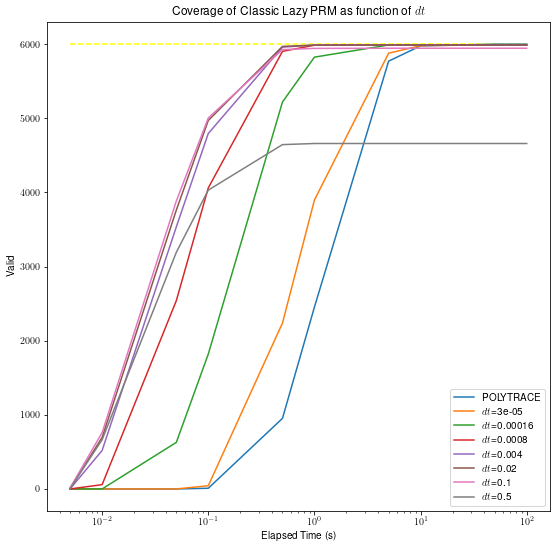

In [31]:
plt.figure(figsize=(9, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')
for v in configs:
    if len(tables[v]) > 0 and v[2] == 'bk':
        if v[0] == 'polytrace':
            label = 'POLYTRACE'
        else:
            label = '$dt$={}'.format(v[1])
        plt.plot(default_time_breakpoints, cov_from_step_size[v], label=label)

plt.title('Coverage of Classic Lazy PRM as function of $dt$')
plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
plt.ylabel('Valid')
plt.legend()
plt.show()

# Gammell Sequence

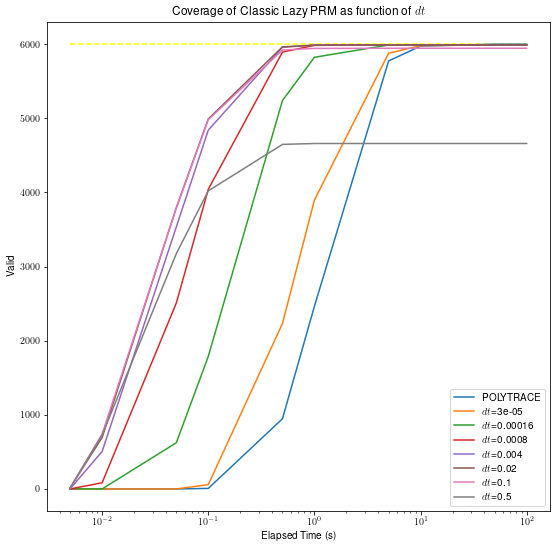

In [32]:

plt.figure(figsize=(9, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')
for v in configs:
    if len(tables[v]) > 0 and v[2] == 'gammell':
        if v[0] == 'polytrace':
            label = 'POLYTRACE'
        else:
            label = '$dt$={}'.format(v[1])
        plt.plot(default_time_breakpoints, cov_from_step_size[v], label=label)

plt.title('Coverage of Classic Lazy PRM as function of $dt$')
plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
plt.ylabel('Valid')
plt.legend()
plt.show()

# Comparison costs

In [33]:
bk_table = table[table['direction'] == 'bk']
bk_cost_table = bk_table[['instance', 'seed', 'sequence', 'elapsed_time', 'iterations', 'smooth_cost_k']]

In [34]:
gammell_table = table[table['direction'] == 'gammell']
gammell_cost_table = gammell_table[['instance', 'seed', 'sequence', 'elapsed_time', 'iterations', 'smooth_cost_k']]

In [35]:
cost_comparison = pd.merge(bk_cost_table, gammell_cost_table, on=('instance', 'seed', 'sequence'), suffixes=('.gammell', '.bk') )

In [36]:
cost_comparison.head()

,instance,seed,sequence,elapsed_time.gammell,iterations.gammell,smooth_cost_k.gammell,elapsed_time.bk,iterations.bk,smooth_cost_k.bk
0,instance_000,1,halton,0.064367,1,12.759945,0.106632,1,12.759945
1,instance_000,1,halton,0.064367,1,12.759945,0.021198,1,12.759945
2,instance_000,1,halton,0.064367,1,12.759945,0.018781,1,12.759945
3,instance_000,1,halton,0.064367,1,12.759945,0.009732,1,12.759945
4,instance_000,1,halton,0.064367,1,12.759945,0.030190,1,12.759945


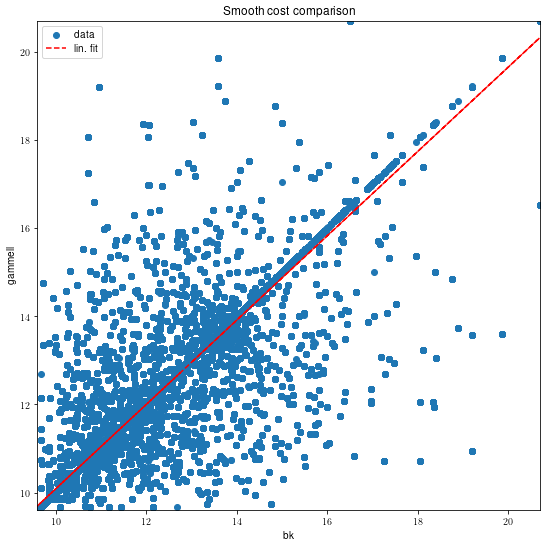

In [37]:
x = cost_comparison['smooth_cost_k.bk'].values
y = cost_comparison['smooth_cost_k.gammell'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='bk', y_name='gammell')

In [38]:
print(lin_model)

LinregressResult(slope=0.956563024840815, intercept=0.5177919444909893, rvalue=0.956563024840816, pvalue=0.0, stderr=0.0004704486504237805, intercept_stderr=0.005649841581818684)


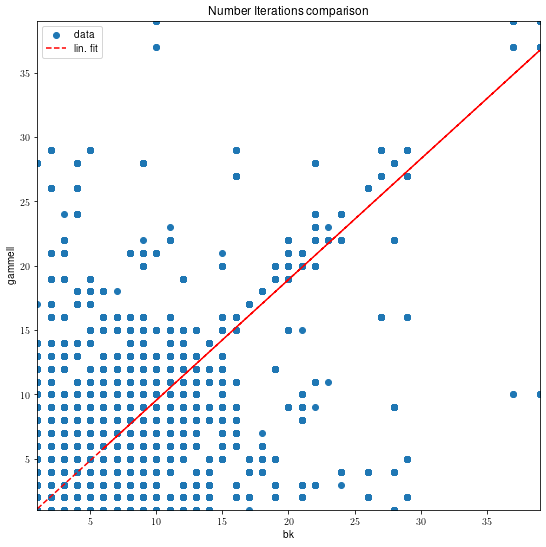

In [39]:
x = cost_comparison['iterations.bk'].values
y = cost_comparison['iterations.gammell'].values

lin_model = compare_with_scatter_chart(x, y, title='Number Iterations comparison', x_name='bk', y_name='gammell')

In [40]:
print(lin_model)

LinregressResult(slope=0.9366053766406977, intercept=0.19013236194642769, rvalue=0.9366053766406977, pvalue=0.0, stderr=0.0005654344934246122, intercept_stderr=0.0023765281378413223)
